## Load data

In [1]:
import os
import re
import functools
import numpy as np
import pandas as pd
import pickle5 as pickle

In [2]:
CURR_PATH = os.getcwd()
DATA_PATH = '/home/svetlanamaslenkova/Documents/data/'
DF_PATH = CURR_PATH +'/dataframes/'

In [3]:
ED_PATH = DATA_PATH+'physionet.org/files/mimic-iv-ed/1.0/ed/'
PKL_PATH = CURR_PATH+'/pickles/'
PKL_PATH

'/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/pickles/'

In [4]:
import pandas as pd

data_icd_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_icd_diagnoses.csv')

data_icd_diagnoses.columns = data_icd_diagnoses.columns.str.lower()

data_icd_diagnoses.head()

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A


In [5]:
import pandas as pd

data_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/diagnoses_icd.csv')

data_diagnoses.columns = data_diagnoses.columns.str.lower()

data_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [6]:
import pandas as pd

data_patients = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/patients.csv')

data_patients.columns = data_patients.columns.str.lower()

data_patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [7]:
import pandas as pd

data_admissions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/admissions.csv')

data_admissions.columns = data_admissions.columns.str.lower()

data_admissions.head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,14679932,21038362,2139-09-26 14:16:00,2139-09-28 11:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0
1,15585972,24941086,2123-10-07 23:56:00,2123-10-12 11:22:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0


In [8]:
data_admissions['hadm_id'] = data_admissions['hadm_id'].astype(int)

In [9]:
import pandas as pd

data_edstays = pd.read_csv(ED_PATH+'edstays.csv')

data_edstays.columns = data_edstays.columns.str.lower()

data_edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime
0,10000115,NaN,38081480,2154-12-10 02:04:00,2154-12-10 02:16:00
1,10000115,NaN,30295111,2154-12-17 16:37:00,2154-12-17 17:38:00
2,10000473,NaN,33267868,2138-03-15 20:07:00,2138-03-15 20:26:00
3,10000764,27897940.0,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59
4,10001038,NaN,34301067,2149-08-07 08:51:00,2149-08-07 08:55:00


In [10]:
import pandas as pd

data_vitals = pd.read_csv(ED_PATH+'vitalsign.csv')

data_vitals.columns = data_vitals.columns.str.lower()

data_vitals.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,16113983,37539106,2116-06-10 00:32:00,98.2,82.0,15.0,NaN,106.0,72.0,NaN,NaN
1,15128994,30058281,2167-08-29 02:25:00,98.3,79.0,20.0,97.0,126.0,73.0,NaN,0
2,15128994,30058281,2167-08-29 04:51:00,97.6,79.0,20.0,98.0,126.0,73.0,NaN,0
3,15128994,30058281,2167-08-29 05:35:00,98.3,76.0,18.0,NaN,123.0,68.0,NaN,0/10
4,18019452,37300626,2148-12-19 12:34:00,98.1,100.0,16.0,98.0,129.0,86.0,NaN,0


In [11]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
data_vitals['charttime'] = pd.to_datetime(data_vitals['charttime'], format=format_)
data_admissions['admittime'] = pd.to_datetime(data_admissions['admittime'], format=format_)
data_admissions['dischtime'] = pd.to_datetime(data_admissions['dischtime'], format=format_)
data_edstays['hadm_id'] = data_edstays['hadm_id'].dropna().astype('uint64')

In [12]:
import pandas as pd

data_farmacy = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/pharmacy.csv')

data_farmacy.columns = data_farmacy.columns.str.lower()

data_farmacy.head(5)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (16,18,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,17868682,22726960,2697460,17868682-19,2160-01-07 14:00:00,2160-01-07 14:00:00,NaN,IV Large Volume,Discontinued,2160-01-07 13:06:18,...,NaN,NaN,NaN,NaN,Ongoing,NaN,Enter on Label,NaN,Distribution-Floor Stock,NaN
1,17868682,22726960,1383959,17868682-20,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent,Unit Dose,Discontinued via patient discharge,2160-01-07 14:25:45,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
2,17868682,22726960,64138666,17868682-23,2160-01-07 15:00:00,2160-01-08 16:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2160-01-07 14:25:45,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Floor Stock Item,NaN
3,17868682,22726960,43535627,17868682-28,2160-01-07 15:00:00,2160-01-08 14:00:00,Ondansetron,Unit Dose,Expired,2160-01-07 14:25:45,...,NaN,NaN,1.0,1.0,Doses,36.0,Hours,NaN,Omnicell,NaN
4,17868682,22726960,13072826,17868682-29,2160-01-07 15:00:00,2160-01-07 16:00:00,Morphine Sulfate,Unit Dose,Discontinued,2160-01-07 14:25:45,...,0.0,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN


In [13]:
data_farmacy.shape

(14736386, 27)

In [14]:
import pandas as pd

data_prescriptions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/prescriptions.csv')

data_prescriptions.columns = data_prescriptions.columns.str.lower()

# data_prescriptions['ndc'] = data_prescriptions['ndc'].astype('uint64')

data_prescriptions.head(5)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [15]:
data_prescriptions.shape

(17008053, 17)

In [16]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
data_prescriptions['starttime'] = pd.to_datetime(data_prescriptions['starttime'], format=format_)
data_prescriptions['stoptime'] = pd.to_datetime(data_prescriptions['stoptime'], format=format_)

In [17]:
data_prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008053 entries, 0 to 17008052
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   subject_id        int64         
 1   hadm_id           int64         
 2   pharmacy_id       int64         
 3   starttime         datetime64[ns]
 4   stoptime          datetime64[ns]
 5   drug_type         object        
 6   drug              object        
 7   gsn               object        
 8   ndc               float64       
 9   prod_strength     object        
 10  form_rx           object        
 11  dose_val_rx       object        
 12  dose_unit_rx      object        
 13  form_val_disp     object        
 14  form_unit_disp    object        
 15  doses_per_24_hrs  float64       
 16  route             object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(10)
memory usage: 2.2+ GB


In [19]:
import pandas as pd

data_labitems = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_labitems.csv')

data_labitems.columns = data_labitems.columns.str.lower()
data_labitems.label = data_labitems.label.str.lower()
labitems = data_labitems.copy()
data_labitems.head(2)

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN


In [37]:
%%time
# print('Loading patients lab events table...')
# print('WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...')

# # data_labevents = pd.read_csv('/content/physionet.org/files/mimiciv/1.0/hosp/labevents.csv', nrows=100000000)
# data_labevents = pd.read_csv('/home/svetlanamaslenkova/Documents/data/mimic-iv-1.0/hosp/labevents.csv', 
#         header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
#                             dtype={'subject_id':'uint32', 'flag':'category', 'valueuom':'category'},
#                        keep_default_na=False,low_memory=False)

# data_labevents.columns = data_labevents.columns.str.lower()


Loading patients lab events table...
WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...


In [88]:
import pickle5 as pickle

with open(PKL_PATH+'labevents.pkl', 'rb') as handle:
    labevents = pickle.load(handle)

In [21]:
labevents.shape

(45588398, 8)

Load labevents table:

In [86]:
# take item ids of all needed features

anion_gap_id = labitems[labitems.label.str.contains('anion').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
albumin_id = labitems[labitems.label.str.contains('albumin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bands_id = labitems[labitems.label.str.contains('bands').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bilirubin_id = labitems[labitems.label.str.contains('bilirubin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hematocrit_id = labitems[labitems.label.str.contains('hematocrit').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
lactate_id = labitems[labitems.label.str.contains('lactate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
sodium_id = labitems[labitems.label.str.contains('sodium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bicarbonate_id = labitems[labitems.label.str.contains('bicarbonate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bun_id = labitems[labitems.label.str.contains('nitrogen').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
calcium_id = labitems[labitems.label.str.contains('calcium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
chloride_id = labitems[labitems.label.str.contains('chloride').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
creatinine_id = labitems[labitems.label.str.contains('creatinine').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hemoglobin_id = list(set(labitems[labitems.label.str.contains('hemoglobin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()) - set(['51212']))
inr_id = labitems[labitems.label.str.contains('inr').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
platelet_id = labitems[labitems.label.str.contains('platelet').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
potassium_id = labitems[labitems.label.str.contains('potassium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
pt_id = ['51274', '52921', '52163', '52164']
ppt_id = ['51275', '52923', '52165', '52166', '52166', '52167']
wbc_id = labitems[labitems.label.str.contains('wbc').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
glucose_id = labitems[labitems.label.str.contains('glucose').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()

In [87]:
# put all codes in one list

temp = [albumin_id, sodium_id, bun_id, creatinine_id, inr_id, pt_id, ppt_id, wbc_id, glucose_id, anion_gap_id, bands_id, bilirubin_id, \
   hematocrit_id,  lactate_id, bicarbonate_id, bun_id, calcium_id, chloride_id, hemoglobin_id, platelet_id, potassium_id]

lab_itemids = []

for l in temp:
    lab_itemids = lab_itemids + l
    
# all needed itemids    
len(lab_itemids)

137

In [198]:
# define a chunksize that would occupy a maximum of 1Gb 
# we divide by 10 because we have selected 10 lines in our df_sample
# we then get the integer part of the result
my_chunk = 1000000

# create the iterator
iter_csv = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/labevents.csv', 
        header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
                            dtype={'subject_id':'uint32', 'flag':'str', 'valueuom':'category'},
                       keep_default_na=False,low_memory=False, iterator=True, chunksize=my_chunk)

# concatenate according to a filter to our result dataframe
df_result = pd.concat(
    [chunk[chunk.itemid.isin(lab_itemids)] 
    for chunk in iter_csv])

In [199]:
df_result.shape

(47211600, 8)

In [200]:
labevents = df_result.copy()

In [89]:
# Removing labevents with no hadm_id or no value

labevents = labevents[labevents.hadm_id != '']
labevents['hadm_id'] = pd.to_numeric(labevents['hadm_id'], errors='coerce')
labevents = labevents.dropna(subset=['hadm_id'])

# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
labevents['charttime'] = pd.to_datetime(labevents['charttime'], format=format_)

# removing duplicated rows and rows with no value
labevents = labevents.drop_duplicates()
labevents = labevents[labevents.value != '']
labevents = labevents.dropna(subset=['value'])
labevents.shape

In [221]:
# # what if we do not delete the results without hadm_id
# labevents['hadm_id'] = pd.to_numeric(labevents['hadm_id'], errors='coerce')
# labevents['hadm_id'] = labevents['hadm_id'].astype(dtype=np.int32, errors='ignore')
# # change charttime column to datettime type
# format_ = '%Y-%m-%d %H:%M:%S'
# labevents['charttime'] = pd.to_datetime(labevents['charttime'], format=format_)

In [92]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28044130 entries, 150 to 122092787
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   subject_id   uint32        
 1   hadm_id      float64       
 2   specimen_id  int64         
 3   itemid       int64         
 4   charttime    datetime64[ns]
 5   value        object        
 6   valueuom     object        
 7   flag         object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), uint32(1)
memory usage: 1.8+ GB


In [93]:
with open(PKL_PATH + 'labevents.pkl', 'wb') as f:
    pickle.dump(labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

## Demographics

In [22]:
# merging admissions amd patients tables to get demographics

data_demographics = pd.merge(data_admissions[['subject_id',	'hadm_id',	'admittime',	'dischtime', 'ethnicity']], \
    data_patients[['subject_id',	'gender',	'anchor_age',	'anchor_year']], \
     how='outer', on=['subject_id'])

In [23]:
# get age of patients at the time of an admission

data_demographics['age_of_birth'] = data_demographics['anchor_year'] - data_demographics['anchor_age']
data_demographics['age'] = [value.year for value in data_demographics['admittime']] - data_demographics['age_of_birth']

In [24]:
# drop unnecessary columns

data_demographics = data_demographics.drop(['anchor_age','anchor_year', 'age_of_birth'], axis=1)
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age
0,14679932,21038362.0,2139-09-26 14:16:00,2139-09-28 11:30:00,UNKNOWN,F,0.0
1,15585972,24941086.0,2123-10-07 23:56:00,2123-10-12 11:22:00,WHITE,F,0.0
2,11989120,21965160.0,2147-01-14 09:00:00,2147-01-17 14:25:00,UNKNOWN,M,0.0
3,17817079,24709883.0,2165-12-27 17:33:00,2165-12-31 21:18:00,OTHER,F,0.0
4,15078341,23272159.0,2122-08-28 08:48:00,2122-08-30 12:32:00,BLACK/AFRICAN AMERICAN,M,0.0


In [ ]:
pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [25]:
# build demographics sentence

data_demographics['demographics'] = data_demographics['ethnicity'].astype(str) + ' ' + data_demographics['gender'].astype(str) + ' ' +  data_demographics['age'].astype(str)

In [26]:
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age,demographics
0,14679932,21038362.0,2139-09-26 14:16:00,2139-09-28 11:30:00,UNKNOWN,F,0.0,UNKNOWN F 0.0
1,15585972,24941086.0,2123-10-07 23:56:00,2123-10-12 11:22:00,WHITE,F,0.0,WHITE F 0.0
2,11989120,21965160.0,2147-01-14 09:00:00,2147-01-17 14:25:00,UNKNOWN,M,0.0,UNKNOWN M 0.0
3,17817079,24709883.0,2165-12-27 17:33:00,2165-12-31 21:18:00,OTHER,F,0.0,OTHER F 0.0
4,15078341,23272159.0,2122-08-28 08:48:00,2122-08-30 12:32:00,BLACK/AFRICAN AMERICAN,M,0.0,BLACK/AFRICAN AMERICAN M 0.0


In [27]:
data_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649140 entries, 0 to 649139
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subject_id    649140 non-null  int64         
 1   hadm_id       523740 non-null  float64       
 2   admittime     523740 non-null  datetime64[ns]
 3   dischtime     523740 non-null  datetime64[ns]
 4   ethnicity     523740 non-null  object        
 5   gender        649140 non-null  object        
 6   age           523740 non-null  float64       
 7   demographics  649140 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 44.6+ MB


In [42]:
with open(PKL_PATH + 'data_demographics.pkl', 'wb') as f:
    pickle.dump(data_demographics, f, protocol=pickle.HIGHEST_PROTOCOL)

## Lab tests

### Laboratory test results

In [94]:
# Removing labevents with no hadm_id

data_labevents = labevents[~labevents.hadm_id.isnull()].copy()
data_labevents.shape

(28044130, 8)

In [95]:
# merge data_labevents and labitems to get more readable table

data_labevents = data_labevents.merge(data_labitems[['itemid', 'label',	'fluid', 'category']], on='itemid')

In [96]:
# number of unique admissions in data_labevents

data_labevents.hadm_id.unique().shape

(425597,)

In [171]:
data_labevents.head()

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
0,10000764,27897940.0,33770094,51221,2132-10-15 00:50:00,40.2,%,,hematocrit,Blood,Hematology
1,10000764,27897940.0,81855644,51221,2132-10-15 05:00:00,38.7,%,abnormal,hematocrit,Blood,Hematology
2,10000764,27897940.0,26598444,51221,2132-10-15 07:45:00,43.1,%,,hematocrit,Blood,Hematology
3,10000764,27897940.0,4318463,51221,2132-10-16 06:03:00,37.0,%,abnormal,hematocrit,Blood,Hematology
4,10000764,27897940.0,9550105,51221,2132-10-17 05:59:00,35.5,%,abnormal,hematocrit,Blood,Hematology


In [98]:
data_labitems.head()

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN
2,51957,17-hydroxycorticosteroids,Urine,Chemistry,NaN
3,51958,"17-ketosteroids, urine",Urine,Chemistry,NaN
4,52068,24 hr,Blood,Hematology,NaN


In [99]:
# remove duplicates rows  from data_labitems and replace NaN values with ''
data_labitems_names =  data_labitems[['itemid', 'category', 'fluid', 'label']].drop_duplicates()
data_labitems_names['label'] = [str(val).replace("NaN", "") for val in data_labitems_names['label']]

# remove duplicates rows  from data_labevents and merge with labitems names
pid_labevents = data_labevents[['subject_id', 'hadm_id', 'charttime', 'itemid', 'value', 'valueuom', 'specimen_id']].drop_duplicates()
pid_labevents = pd.merge(pid_labevents, data_labitems_names, on=['itemid'])
pid_labevents = pd.merge(pid_labevents, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# make sentences for labevents
pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [100]:
# make day_id column with day 0 is first 24 hours of admission

pid_labevents['day_id'] = pid_labevents['charttime'] - pid_labevents['admittime']
pid_labevents['day_id'] = [d.days for d in pid_labevents.iloc[:, -1]]

In [101]:
# min and max day_id values

print(np.min(pid_labevents.day_id))
print(np.max(pid_labevents.day_id))

-4
1190


In [102]:
# concatenating labtests from the same day into one big sentence

res = pid_labevents.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).lab_test\
        .apply('; '.join)\
            .reset_index(name='lab_tests')

res

,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
3,16925328,20000024,0,Hematology Blood hematocrit {32.1} %; Hematolo...
4,19430048,20000034,0,Hematology Blood hematocrit {30.3} %; Hematolo...
...,...,...,...,...
1828569,16572164,29999828,0,Hematology Blood hematocrit {45.0} %
1828570,16572164,29999828,1,Hematology Blood hematocrit {43.1} %; Hematolo...
1828571,16549335,29999928,0,Hematology Blood hematocrit {38.6} %; Hematolo...
1828572,16549335,29999928,1,Hematology Blood hematocrit {32.0} %; Hematolo...


In [103]:
pid_labevents = res.copy()

In [104]:
print(pid_labevents.shape)
print(res.shape)

(1828574, 4)
(1828574, 4)


In [105]:
# with open(PKL_PATH + 'pid_labevents.pkl', 'wb') as f:
#     pickle.dump(pid_labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

### Creatinine

In [173]:
#  replacing NaN with 0 for hadm_id

# labevents['hadm_id'] = labevents['hadm_id'].fillna(0).astype(dtype=np.int32, errors='ignore')
# labevents

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag
150,10000764,27897940,33770094,51221,2132-10-15 00:50:00,40.2,%,
151,10000764,27897940,81855644,51221,2132-10-15 05:00:00,38.7,%,abnormal
154,10000764,27897940,26598444,51221,2132-10-15 07:45:00,43.1,%,
155,10000764,27897940,26598444,51222,2132-10-15 07:45:00,14.3,g/dL,
162,10000764,27897940,26598444,51265,2132-10-15 07:45:00,169,K/uL,
...,...,...,...,...,...,...,...,...
122067786,14954698,22076752,65000859,51518,2192-02-29 14:00:00,FEW,,
122067788,17277045,27943288,26155969,51518,2135-07-03 11:31:00,MANY,,
122067789,15268535,24926576,55507102,51518,2151-03-17 13:03:00,MOD,,
122074191,19265828,22506499,88071074,51237,2161-07-05 05:40:00,ERROR,,abnormal


In [174]:
# the createnine codes we are interested in 

itemid_creatinine = [50912, 52024, 51081]

data_labitems[data_labitems.itemid.isin(itemid_creatinine)]

,itemid,label,fluid,category,loinc_code
514,50912,creatinine,Blood,Chemistry,2160-0
523,51081,"creatinine, serum",Urine,Chemistry,NaN
526,52024,"creatinine, whole blood",Blood,Blood Gas,NaN


In [176]:
# filtering data_labevents table to get only creatinine lab tests

labevents_creatinine = data_labevents[data_labevents.itemid.isin(itemid_creatinine)].copy()
# labevents_creatinine = labevents[labevents.itemid.isin(itemid_creatinine)].copy()

In [177]:
labevents_creatinine.shape

(1996562, 11)

In [178]:
labevents_creatinine

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
11863832,10000764,27897940.0,42075698,50912,2132-10-15 07:45:00,1.5,mg/dL,abnormal,creatinine,Blood,Chemistry
11863833,10000764,27897940.0,43331822,50912,2132-10-16 06:03:00,1.4,mg/dL,abnormal,creatinine,Blood,Chemistry
11863834,10000764,27897940.0,24885655,50912,2132-10-17 05:59:00,1.5,mg/dL,abnormal,creatinine,Blood,Chemistry
11863835,10000764,27897940.0,79417058,50912,2132-10-18 06:10:00,1.6,mg/dL,abnormal,creatinine,Blood,Chemistry
11863836,10000764,27897940.0,23075119,50912,2132-10-19 07:28:00,1.6,mg/dL,abnormal,creatinine,Blood,Chemistry
...,...,...,...,...,...,...,...,...,...,...,...
27972330,18527418,28559683.0,79002836,51081,2115-03-13 16:22:00,1.4,mg/dL,,"creatinine, serum",Urine,Chemistry
27972331,18527418,23546357.0,89449470,51081,2116-09-05 15:48:00,1.7,mg/dL,,"creatinine, serum",Urine,Chemistry
27972332,18527418,29127037.0,5072122,51081,2117-10-03 10:53:00,1.6,mg/dL,,"creatinine, serum",Urine,Chemistry
27972333,19538400,22032603.0,5942754,51081,2137-03-11 14:37:00,2.2,mg/dL,,"creatinine, serum",Urine,Chemistry


In [179]:
data_labevents.shape # 28619957

(28044130, 11)

In [180]:
# converting value into float

labevents_creatinine['value'] = labevents_creatinine['value'].astype(float)

In [181]:
labevents_creatinine.hadm_id.unique().shape

(342401,)

In [182]:
# keep only first test
hid_normal_1_test = labevents_creatinine[~labevents_creatinine.hadm_id.isna()]\
    .copy().sort_values(['hadm_id', 'charttime']).drop_duplicates(subset=['hadm_id'], keep='first')

# first test & normal
hid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].hadm_id.to_list()
pid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].subject_id.to_list()
#hid_normal_1test = [int(adm) for adm in hid_normal_1test]

print(f'admissions with the first SCr normal {len(hid_normal_1test)} ')
print(f'patients with the first SCr normal {len(hid_normal_1test)} ')

admissions with the first SCr normal 251589 
patients with the first SCr normal 251589 


In [183]:
# kepp anly admissions with the first SCr - nornal

labevents_creatinine = labevents_creatinine[['subject_id', 'hadm_id', 'charttime', 'value', 'valueuom']]
labevents_creatinine = labevents_creatinine.merge(data_admissions[['subject_id', 'hadm_id', 'admittime']],  how='left', on=['subject_id', 'hadm_id'])
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(hid_normal_1test)]

In [185]:
# filter out admissions with less than 2 SCr measurements
S = labevents_creatinine.groupby('hadm_id').count().sort_values('subject_id')
filtered_admissions = S[S.subject_id>1].index.to_list()

# filter out admissions with  less than 2 creatinine measurements
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(filtered_admissions)]

In [186]:
# inserting the day_id column

labevents_creatinine['day_id'] = labevents_creatinine['charttime'] - labevents_creatinine['admittime']
labevents_creatinine['day_id'] = [d.days for d in labevents_creatinine.iloc[:, -1]]

In [187]:
labevents_creatinine.hadm_id.unique().shape

(180989,)

In [188]:
# min and max day_id in labevents_creatinine dataframe

print(np.min(labevents_creatinine.day_id))
print(np.max(labevents_creatinine.day_id))

-4.0
1190.0


In [189]:
# remove duplicates and convert hadm_id into int type

labevents_creatinine = labevents_creatinine.drop_duplicates()
labevents_creatinine['hadm_id'] = labevents_creatinine['hadm_id'].astype(dtype=np.int32)

In [190]:
labevents_creatinine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187355 entries, 9 to 1996561
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   subject_id  1187355 non-null  uint32        
 1   hadm_id     1187355 non-null  int32         
 2   charttime   1187355 non-null  datetime64[ns]
 3   value       1187355 non-null  float64       
 4   valueuom    1187355 non-null  object        
 5   admittime   1187177 non-null  datetime64[ns]
 6   day_id      1187177 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), object(1), uint32(1)
memory usage: 63.4+ MB


In [191]:
labevents_creatinine.head()

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
9,10003299,21476780,2183-02-26 22:18:00,1.1,mg/dL,2183-02-27 15:18:00,-1.0
10,10003299,21476780,2183-02-28 06:42:00,0.9,mg/dL,2183-02-27 15:18:00,0.0
11,10003299,20940957,2183-06-27 05:57:00,0.6,mg/dL,2183-06-26 20:27:00,0.0
12,10003299,20940957,2183-06-28 04:42:00,0.7,mg/dL,2183-06-26 20:27:00,1.0
13,10003299,20940957,2183-06-29 05:34:00,0.7,mg/dL,2183-06-26 20:27:00,2.0


### Calculating AKI time

In [192]:
# function for calculating AKI status for each day of an admission

def get_aki_status(admission):
    adm_labs = labevents_creatinine[(labevents_creatinine.hadm_id==admission)].sort_values('day_id')
    # admittime = data_admissions[data_admissions.hadm_id==admission].admittime
    days = list(adm_labs.day_id.values)
    hadm_ids = []
    aki_status = []
    aki_happened = False
    all_days = np.arange(np.min(days), np.max(days)+1)
    
    for day in all_days:
        # print(day)
        hadm_ids.append(admission)
        # first 24 hours of an admission no AKI
        if day == days[0]:
            aki_status.append(0)
            continue
        # put Nan if we do not have SCr measurements for a given day
        elif day not in days:
            aki_status.append(np.nan)
            continue

        # get current day's value
        scr_day = float(adm_labs[adm_labs.day_id==day].sort_values('value', ascending=False).value.values[0])
        # print(f'day {day} creatinine {scr_day}')

        if not aki_happened: 
            # get baselines values
            if len(adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day))]) > 0:
                scr_baseline_1 = adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day+1))].sort_values('value', ascending=True).value.values[0]
            elif len(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day))]) > 0:
                scr_baseline_1 = np.median(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day+1))].value.values)
            else:
                scr_baseline_1 = None

            if len(adm_labs[adm_labs.day_id==(day - 1)]) > 0:
                scr_baseline_2 = adm_labs[adm_labs.day_id.isin(np.arange((day - 1), day+1))].sort_values('value', ascending=True).value.values[0]
            else:
                scr_baseline_2 = None
            # print(f' baseline1 = {scr_baseline_1}, baseline2 = {scr_baseline_2}')

        # calculate aki
        if (scr_baseline_1 is not None)&(scr_baseline_2 is not None):
            if (scr_day >= 1.5*float(scr_baseline_1) ) or (scr_day >= 0.29 + float(scr_baseline_2) ):
                aki_status.append(1)
                aki_happened = True
            else:
                aki_status.append(0)

        elif scr_baseline_1 is not None:
            if scr_day >= 1.5*float(scr_baseline_1):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)

        elif scr_baseline_2 is not None:
            if scr_day >= 0.3 + float(scr_baseline_2):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)
        else:
            aki_status.append(np.nan)

    return {'hadm_id':hadm_ids, 'day_id':all_days, 'aki_status':aki_status}

In [140]:
admission = 20000041
adm_labs = labevents_creatinine[labevents_creatinine.hadm_id==admission].sort_values('day_id')
adm_labs

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
956915,18910522,20000041,2143-09-03 22:23:00,1.1,mg/dL,2143-09-03 07:15:00,0.0
956916,18910522,20000041,2143-09-05 07:16:00,1.1,mg/dL,2143-09-03 07:15:00,2.0
956917,18910522,20000041,2143-09-06 06:10:00,1.1,mg/dL,2143-09-03 07:15:00,2.0


In [195]:
get_aki_status(admission)

{'hadm_id': [20000041, 20000041, 20000041],
 'day_id': array([0., 1., 2.]),
 'aki_status': [0, nan, 0]}

In [196]:
patients = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').subject_id.to_list()
admissions = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').hadm_id.to_list()

In [197]:
len(admissions)

180974

In [198]:
len(patients)

180974

In [199]:
len(data_patients.subject_id.unique())

382278

Running the function using Multiprocessing: 

In [200]:
%%time
import traceback
import multiprocessing

final_aki_status = pd.DataFrame()
final_aki_status = pd.DataFrame()
chunk_size = 50000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=88) as pool_obj:
        pid_aki_status = pool_obj.map(get_aki_status, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in pid_aki_status[:]:
        temp = pd.DataFrame(e)
        final_aki_status = pd.concat([final_aki_status, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_aki_status.pkl', 'wb') as f:
    #     pickle.dump(final_aki_status, f, protocol=pickle.HIGHEST_PROTOCOL)

Finished 50000 admissions
Finished 100000 admissions
Finished 150000 admissions
Finished 200000 admissions
CPU times: user 11min 17s, sys: 1min 14s, total: 12min 31s
Wall time: 15min 39s


In [201]:
len(final_aki_status.hadm_id.unique())

180974

In [126]:
# with open(PKL_PATH + 'pid_aki_status.pkl', 'wb') as f:
#     pickle.dump(final_aki_status, f, protocol=pickle.HIGHEST_PROTOCOL)

Here we are manually checking some of the labels:

In [202]:
final_aki_status.head(35)

,hadm_id,day_id,aki_status
0,21476780,-1.0,0.0
1,21476780,0.0,0.0
2,20940957,0.0,0.0
3,20940957,1.0,0.0
4,20940957,2.0,0.0
5,20940957,3.0,0.0
6,20940957,4.0,0.0
7,27373340,0.0,0.0
8,27373340,1.0,0.0
9,27373340,2.0,0.0


In [166]:
adm = 29279905
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10019003,29279905,12,R0902,10,Hypoxemia
1,10019003,29279905,21,L271,10,Localized skin eruption due to drugs and medic...
2,10019003,29279905,5,D471,10,Chronic myeloproliferative disease
3,10019003,29279905,2,R6521,10,Severe sepsis with septic shock
4,10019003,29279905,17,G4733,10,Obstructive sleep apnea (adult) (pediatric)
5,10019003,29279905,18,J45909,10,"Unspecified asthma, uncomplicated"
6,10019003,29279905,3,N179,10,"Acute kidney failure, unspecified"
7,10019003,29279905,16,I10,10,Essential (primary) hypertension
8,10019003,29279905,1,A419,10,"Sepsis, unspecified organism"
9,10019003,29279905,25,Z66,10,Do not resuscitate


In [170]:
data_labevents[data_labevents.hadm_id==adm].sort_values('charttime')

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
283,10019003,29279905.0,70400502,51221,2153-03-28 03:16:00,30.9,%,abnormal,hematocrit,Blood,Hematology
7835422,10019003,29279905.0,68688445,50882,2153-03-28 03:16:00,15,mEq/L,abnormal,bicarbonate,Blood,Chemistry
9822025,10019003,29279905.0,68688445,50902,2153-03-28 03:16:00,107,mEq/L,,chloride,Blood,Chemistry
11864104,10019003,29279905.0,68688445,50912,2153-03-28 03:16:00,2.5,mg/dL,abnormal,creatinine,Blood,Chemistry
2035721,10019003,29279905.0,70400502,51222,2153-03-28 03:16:00,10.1,g/dL,abnormal,hemoglobin,Blood,Hematology
...,...,...,...,...,...,...,...,...,...,...,...
3933045,10019003,29279905.0,57896560,51265,2153-04-07 05:47:00,84,K/uL,abnormal,platelet count,Blood,Hematology
15936624,10019003,29279905.0,13783863,50983,2153-04-07 05:47:00,144,mEq/L,,sodium,Blood,Chemistry
11864115,10019003,29279905.0,13783863,50912,2153-04-07 05:47:00,0.8,mg/dL,,creatinine,Blood,Chemistry
13859011,10019003,29279905.0,13783863,50971,2153-04-07 05:47:00,3.0,mEq/L,abnormal,potassium,Blood,Chemistry


In [159]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
20438,10005348,29496232,2128-09-05 08:30:00,2128-09-12 16:55:00,NaN,ELECTIVE,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [160]:
final_aki_status[final_aki_status.hadm_id==adm]

,hadm_id,day_id,aki_status
36,29496232,0.0,0.0
37,29496232,1.0,0.0
38,29496232,2.0,NaN
39,29496232,3.0,NaN
40,29496232,4.0,0.0
41,29496232,5.0,1.0
42,29496232,6.0,0.0


In [161]:
labevents_creatinine[labevents_creatinine.hadm_id==adm]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
91,10005348,29496232,2128-09-06 06:30:00,0.8,mg/dL,2128-09-05 08:30:00,0.0
92,10005348,29496232,2128-09-07 05:50:00,0.8,mg/dL,2128-09-05 08:30:00,1.0
93,10005348,29496232,2128-09-09 10:50:00,0.8,mg/dL,2128-09-05 08:30:00,4.0
94,10005348,29496232,2128-09-09 18:45:00,0.7,mg/dL,2128-09-05 08:30:00,4.0
95,10005348,29496232,2128-09-10 07:35:00,0.8,mg/dL,2128-09-05 08:30:00,4.0
96,10005348,29496232,2128-09-10 19:30:00,1.0,mg/dL,2128-09-05 08:30:00,5.0
97,10005348,29496232,2128-09-11 07:25:00,0.9,mg/dL,2128-09-05 08:30:00,5.0
98,10005348,29496232,2128-09-12 07:00:00,0.8,mg/dL,2128-09-05 08:30:00,6.0


In [164]:
labevents_creatinine.iloc[120:150,:]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
197,10012663,27340067,2171-06-02 04:30:00,0.7,mg/dL,2171-05-18 10:54:00,14.0
198,10012663,27340067,2171-06-06 19:50:00,0.6,mg/dL,2171-05-18 10:54:00,19.0
236,10014536,24693529,2113-12-22 05:00:00,0.6,mg/dL,2113-12-19 17:55:00,2.0
237,10014536,24693529,2113-12-23 01:35:00,0.7,mg/dL,2113-12-19 17:55:00,3.0
238,10014536,24693529,2113-12-25 05:45:00,0.7,mg/dL,2113-12-19 17:55:00,5.0
239,10014536,24693529,2113-12-25 09:10:00,0.8,mg/dL,2113-12-19 17:55:00,5.0
240,10016673,29103261,2188-03-19 06:05:00,0.8,mg/dL,2188-03-18 18:00:00,0.0
241,10016673,29103261,2188-03-20 06:30:00,0.7,mg/dL,2188-03-18 18:00:00,1.0
251,10017886,20015927,2140-12-16 05:00:00,0.7,mg/dL,2140-12-15 18:55:00,0.0
252,10017886,20015927,2140-12-17 06:40:00,0.9,mg/dL,2140-12-15 18:55:00,1.0


In [165]:
get_aki_status(29279905)

{'hadm_id': [29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905],
 'day_id': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 'aki_status': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

## Vitals

In [71]:
# replacing Nan values with ''

pid_vitals = pd.merge(data_edstays, data_vitals).drop_duplicates()
pid_vitals['temperature'] = pid_vitals['temperature'].fillna('')
pid_vitals['heartrate'] = pid_vitals['heartrate'].fillna('')
pid_vitals['resprate'] = pid_vitals['resprate'].fillna('')
pid_vitals['o2sat'] = pid_vitals['o2sat'].fillna('')
pid_vitals['sbp'] = pid_vitals['sbp'].fillna('')
pid_vitals['dbp'] = pid_vitals['dbp'].fillna('')
pid_vitals['rhythm'] = pid_vitals['rhythm'].fillna('')
pid_vitals['pain'] = pid_vitals['pain'].fillna('')

In [72]:
# making sentence for each vital signs measurement

pid_vitals['vitals'] = 'temp {' + pid_vitals['temperature'].astype(str) + '} ' + 'heartrate {' + pid_vitals['heartrate'].astype(str) +'} ' \
    + 'resprate {' + pid_vitals['resprate'].astype(str) + '} ' + 'o2sat {' + pid_vitals['o2sat'].astype(str) + '} ' \
         + 'sbp {' + pid_vitals['sbp'].astype(str) + '} ' + 'dbp {' + pid_vitals['dbp'].astype(str) + '} ' \
             + 'rhythm {' + pid_vitals['rhythm'].astype(str) + '} ' + 'pain {' + pid_vitals['pain'].astype(str) + '} ' 


In [73]:
# an example of a single measurement

pid_vitals.iloc[1, -1]

'temp {98.0} heartrate {78.0} resprate {16.0} o2sat {99.0} sbp {116.0} dbp {70.0} rhythm {} pain {0} '

In [74]:
# remove rows with no hadm_id and merge with admissions table

pid_vitals = pid_vitals[~pid_vitals.hadm_id.isna()]
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_vitals = pd.merge(pid_vitals, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# making the day_id column
pid_vitals['day_id'] = pid_vitals['charttime'] - pid_vitals['admittime']
pid_vitals['day_id'] = [d.days for d in pid_vitals.iloc[:, -1]]

In [75]:
# min and max day_id values
print(min(pid_vitals.day_id))
print(max(pid_vitals.day_id))

-24
17


In [76]:
# drop unnecessary columns

pid_vitals = pid_vitals[['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vitals', 'day_id']]

In [77]:
pid_vitals.shape

(1107449, 6)

In [79]:
# converting subject_id and hadm_id into the right type (int)

pid_vitals['subject_id'] = pid_vitals['subject_id'].astype(int)
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_labevents['subject_id'] = pid_labevents['subject_id'].astype(int)
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [80]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vitals,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [81]:
pid_vitals.columns = ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vital', 'day_id']

In [82]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vital,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [83]:
# concatenating the vital sighn measurements from the same day into one sentence

res_vitals = pid_vitals.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).vital\
        .apply('; '.join)\
            .reset_index(name='vitals')

res_vitals

,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
2,16925328,20000024,-1,temp {98.7} heartrate {72.0} resprate {16.0} o...
3,16925328,20000024,0,temp {98.2} heartrate {53.0} resprate {18.0} o...
4,11146739,20000057,-1,temp {99.3} heartrate {81.0} resprate {16.0} o...
...,...,...,...,...
379301,14544496,29999596,0,temp {99.2} heartrate {91.0} resprate {24.0} o...
379302,10355856,29999625,-1,temp {} heartrate {} resprate {} o2sat {} sbp ...
379303,10355856,29999625,0,temp {37.5} heartrate {63.0} resprate {18.0} o...
379304,12133002,29999809,-1,temp {} heartrate {70.0} resprate {15.0} o2sat...


In [84]:
print(pid_vitals.shape)
print(res_vitals.shape)

(1107449, 6)
(379306, 4)


In [85]:
# an example
res_vitals.iloc[10,-1]

'temp {97.7} heartrate {86.0} resprate {18.0} o2sat {99.0} sbp {138.0} dbp {78.0} rhythm {} pain {7} ; temp {98.5} heartrate {54.0} resprate {16.0} o2sat {96.0} sbp {102.0} dbp {51.0} rhythm {} pain {7/10} ; temp {} heartrate {64.0} resprate {18.0} o2sat {98.0} sbp {128.0} dbp {76.0} rhythm {} pain {7/10} ; temp {98.1} heartrate {54.0} resprate {18.0} o2sat {98.0} sbp {120.0} dbp {74.0} rhythm {} pain {} '

In [86]:
pid_vitals = res_vitals.copy()

In [87]:
# with open(PKL_PATH + 'pid_vitals.pkl', 'wb') as f:
#     pickle.dump(pid_vitals, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

## Medications

In [41]:
data_prescriptions.head()

,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [42]:
data_prescriptions['dose_val_rx'] = data_prescriptions['dose_val_rx'].fillna('') 
data_prescriptions['dose_unit_rx'] = data_prescriptions['dose_unit_rx'].fillna('') 
data_prescriptions = data_prescriptions.dropna(subset=['drug'])

In [43]:
data_prescriptions = data_prescriptions.dropna(subset=['starttime'])

In [44]:
pid_prescriptions = data_prescriptions[['subject_id', 'hadm_id', 'pharmacy_id', 'starttime', 'stoptime', 'drug', 'dose_val_rx', 'dose_unit_rx']]
pid_prescriptions = pd.merge(pid_prescriptions,  data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

pid_prescriptions['medication'] = pid_prescriptions['drug'].astype(str) + ' {' + pid_prescriptions['dose_val_rx'].astype(str) + '} ' + pid_prescriptions['dose_unit_rx'].astype(str) + ' '


In [45]:
pid_prescriptions = pid_prescriptions[['subject_id', 'hadm_id', 'starttime', 'stoptime', 'medication']]

In [46]:
pid_prescriptions = pid_prescriptions[~pid_prescriptions.hadm_id.isna()]
# pid_prescriptions['hadm_id'] = pid_prescriptions['hadm_id'].astype(int)
pid_prescriptions = pd.merge(pid_prescriptions, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00


In [47]:
pid_prescriptions['start_day_id'] = pid_prescriptions['starttime'] - pid_prescriptions['admittime']
pid_prescriptions['stop_day_id'] = pid_prescriptions['stoptime'] - pid_prescriptions['admittime']

In [ ]:
pid_prescriptions['start_day_id'] = [int(d.days) for d in pid_prescriptions.iloc[:, -2]]
pid_prescriptions['stop_day_id'] = [d.days for d in pid_prescriptions.iloc[:, -1]]

In [346]:
pid_prescriptions['stop_day_id'] = pid_prescriptions['stop_day_id'].fillna(pid_prescriptions['start_day_id']).astype(int)

In [91]:
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1


In [352]:
# with open(PKL_PATH + 'pid_prescriptions.pkl', 'wb') as f:
#     pickle.dump(pid_prescriptions, f, protocol=pickle.HIGHEST_PROTOCOL)

In [88]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_prescriptions.pkl', 'rb') as f:
    pid_prescriptions = pickle.load(f)

In [93]:
pid_med = pid_prescriptions.copy()
pid_med = pid_med[pid_med.start_day_id >= -2] 

In [94]:
def get_medications(adm):
   
    pid_adm_med = pid_med.copy()
    pid_adm_med = pid_adm_med[pid_adm_med.hadm_id.isin([adm])]

    min_day_id = np.min(pid_adm_med.start_day_id)
    max_day_id = np.max(pid_adm_med.stop_day_id)
    days = max_day_id - min_day_id

    subject_id = []
    hadm_id = []
    day_id = np.arange(min_day_id, max_day_id + 1, 1).tolist()
    meds = pid_adm_med['medication'].unique()
    medications = []

    for idx, day in enumerate(day_id):
        subject_id.append(pid_adm_med.subject_id.unique()[0])
        hadm_id.append(pid_adm_med.hadm_id.unique()[0])
        day_meds = ''
        for med in meds:
            temp = pid_adm_med[pid_adm_med.medication.isin([med])]
            if (int(temp.start_day_id.unique()[0]) <= day) and (int(temp.stop_day_id.unique()[0]) >= day):
                day_meds += med + "; "
        medications.append(day_meds)
       
        
    pid_medications = {'subject_id': subject_id, 'hadm_id': hadm_id, 'day_id': day_id, 'medications': medications}
    return pid_medications


In [107]:
pid_hamds = list(pid_med.hadm_id.unique())
len(pid_hamds)

452098

In [111]:
# %%time
# import traceback
# import multiprocessing

# final_meds = pd.DataFrame()
# pid_hamds = list(pid_med.hadm_id.unique())

# with multiprocessing.Pool(processes=88) as pool_obj:
#     pid_medications = pool_obj.map(get_medications, pid_hamds[:50])


CPU times: user 1.3 s, sys: 15.7 s, total: 17 s
Wall time: 2min 37s


In [110]:
chunk_size = 50000
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size
n_chunks

9

In [ ]:
%%time
import traceback
import multiprocessing

final_meds = pd.DataFrame()
chunk_size = 10
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size


for i in range(0,30):
    with multiprocessing.Pool(processes=88) as pool_obj:
        pid_medications = pool_obj.map(get_medications, pid_hamds[i*chunk_size:(i+1)*chunk_size])

    for e in pid_medications[:]:
        temp = pd.DataFrame(e)
        final_meds = pd.concat([final_meds, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
    #     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
#     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

Here we manually checking some of the predictions:

In [101]:
adm = 22726960
pid_prescriptions[pid_prescriptions.hadm_id==adm]

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1
5,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Sodium Chloride 0.9% Flush {3} mL,2160-01-07 12:00:00,0,1
6,17868682,22726960,2160-01-07 15:00:00,2160-01-08 14:00:00,Ondansetron {4} mg,2160-01-07 12:00:00,0,1
7,17868682,22726960,2160-01-07 15:00:00,2160-01-07 16:00:00,Morphine Sulfate {2-4} mg,2160-01-07 12:00:00,0,0
8,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pantoprazole {40} mg,2160-01-07 12:00:00,0,1
9,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Aluminum-Magnesium Hydrox.-Simethicone {15-30}...,2160-01-07 12:00:00,0,1


In [102]:
data_labevents[data_labevents.hadm_id==adm]

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label_x,fluid_x,category_x,loinc_code,label_y,fluid_y,category_y
438491,17868682,22726960,28372620,50912,2160-01-08 06:50:00,1.1,mg/dL,,creatinine,Blood,Chemistry,2160-0,creatinine,Blood,Chemistry
2416283,17868682,22726960,28372620,50983,2160-01-08 06:50:00,142.0,mEq/L,,sodium,Blood,Chemistry,2951-2,sodium,Blood,Chemistry
4493690,17868682,22726960,28372620,51006,2160-01-08 06:50:00,18.0,mg/dL,,urea nitrogen,Blood,Chemistry,3094-0,urea nitrogen,Blood,Chemistry
7357861,17868682,22726960,28372620,50931,2160-01-08 06:50:00,107.0,mg/dL,abnormal,glucose,Blood,Chemistry,6777-7,glucose,Blood,Chemistry


In [104]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
125978,17868682,22726960,2160-01-07 12:00:00,2160-01-08 12:23:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,2160-01-07 02:37:00,2160-01-07 13:42:00,0


In [105]:
get_medications(adm)

{'subject_id': [17868682, 17868682, 17868682],
 'hadm_id': [22726960, 22726960, 22726960],
 'day_id': [-1, 0, 1],
 'medications': ['BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; ',
  'BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; 1/2 NS {1000} mL ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Morphine Sulfate {2-4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Warfarin {6} mg ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ',
  'BuPROPion (Sustained Release) {150} mg ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ']}

## PID

### Loading dataframes

In [8]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

In [207]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

In [208]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_medications.pkl', 'rb') as f:
    pid_medications = pickle.load(f)

In [209]:
with open(PKL_PATH + 'data_demographics.pkl', 'rb') as f:
    data_demographics = pickle.load(f)

In [210]:
# pid_aki_status
with open(PKL_PATH + 'pid_aki_status.pkl', 'rb') as f:
    final_aki_status = pickle.load(f)

In [213]:
pid_medications['subject_id'] = pid_medications['subject_id'].astype(int)
pid_medications['hadm_id'] = pid_medications['hadm_id'].astype(int)
pid_medications['day_id'] = pid_medications['day_id'].astype(int)

In [214]:
print(pid_medications.shape)
print('unique admissions: ', pid_medications.hadm_id.unique().shape)
pid_medications.head()

(2735020, 4)
unique admissions:  (452097,)


,subject_id,hadm_id,day_id,medications
0,17868682,22726960,-1,BuPROPion (Sustained Release) {300} mg ; BuPRO...
1,17868682,22726960,0,BuPROPion (Sustained Release) {300} mg ; BuPRO...
2,17868682,22726960,1,BuPROPion (Sustained Release) {150} mg ; Pneum...
3,17868682,25218370,0,Sodium Chloride 0.9% Flush {3} mL ; Lactated ...
4,17868682,25218370,1,Sodium Chloride 0.9% Flush {3} mL ; Acetamino...


In [215]:
print(pid_labevents.shape)
print('unique admissions: ', pid_labevents.hadm_id.unique().shape)
pid_labevents.head(10)

(1828574, 4)
unique admissions:  (425573,)


,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
3,16925328,20000024,0,Hematology Blood hematocrit {32.1} %; Hematolo...
4,19430048,20000034,0,Hematology Blood hematocrit {30.3} %; Hematolo...
5,19430048,20000034,1,Hematology Blood hematocrit {31.9} %; Hematolo...
6,18910522,20000041,0,Hematology Blood hematocrit {28.2} %; Hematolo...
7,18910522,20000041,1,"Chemistry Blood bilirubin, total {0.5} mg/dL; ..."
8,18910522,20000041,2,Hematology Blood hematocrit {25.4} %; Hematolo...
9,11868001,20000055,2,"Chemistry Blood bilirubin, indirect {10.5} mg/..."


In [50]:
print(pid_vitals.shape)
print('unique admissions: ', pid_vitals.hadm_id.unique().shape)
pid_vitals.head()

(379306, 4)
unique admissions:  (208235,)


,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
2,16925328,20000024,-1,temp {98.7} heartrate {72.0} resprate {16.0} o...
3,16925328,20000024,0,temp {98.2} heartrate {53.0} resprate {18.0} o...
4,11146739,20000057,-1,temp {99.3} heartrate {81.0} resprate {16.0} o...


In [217]:
from functools import reduce

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id])))
print(f' number of common patients (labs + meds) {len(common_hadm_ids)}')

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id, pid_vitals.hadm_id])))
print(f' number of common patients (labs + meds + vitals) {len(common_hadm_ids)}')

 number of common patients (labs + meds) 413840
 number of common patients (labs + meds + vitals) 154791


### Making PID dataframe

Since labs and meds have a lot of admissions in common and vitals has much less admissions in common, we first inner joing labs amd meds, and then outer join vitals to the result. 

OR we outer join all 3 dataframes.

In [218]:
print(f'The number of patients in mimic {len(data_patients.subject_id.unique())}')
print(f'The number of admissions in mimic {len(data_admissions.hadm_id.unique())}')

The number of patients in mimic 382278
The number of admissions in mimic 523740


In [223]:
pid = pid_medications.merge(pid_labevents, how='outer', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(pid_vitals,  how='left', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(data_demographics[['subject_id', 'hadm_id', 'demographics']], how='left')


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [229]:
print(pid.shape)
print(len(pid.hadm_id.unique()))

(2796097, 7)
463830


In [ ]:
pid = pid_labevents.merge(pid_medications, how='outer', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(pid_vitals,  how='outer', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(data_demographics[['subject_id', 'hadm_id', 'demographics']], how='inner')


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [232]:
print(pid.shape)
print(len(pid.hadm_id.unique()))

(2796097, 7)
463830


In [225]:
pid = pid.sort_values(['hadm_id', 'day_id'])

In [234]:
pid.head(10)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics
1411116,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0
1411117,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0
1411118,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0
306556,16925328,20000024,0,OxyCODONE (Immediate Release) {2.5} mg ; Gabap...,Hematology Blood hematocrit {32.1} %; Hematolo...,temp {98.2} heartrate {53.0} resprate {18.0} o...,WHITE F 92.0
306557,16925328,20000024,1,Sodium Chloride 0.9% Flush {3} mL ; Heparin {...,NaN,NaN,WHITE F 92.0
2468332,19430048,20000034,0,Influenza Vaccine Quadrivalent {0.5} mL ; Sodi...,Hematology Blood hematocrit {30.3} %; Hematolo...,NaN,BLACK/AFRICAN AMERICAN M 74.0
2468333,19430048,20000034,1,Influenza Vaccine Quadrivalent {0.5} mL ; Sodi...,Hematology Blood hematocrit {31.9} %; Hematolo...,NaN,BLACK/AFRICAN AMERICAN M 74.0
2468334,19430048,20000034,2,Influenza Vaccine Quadrivalent {0.5} mL ; Sodi...,NaN,NaN,BLACK/AFRICAN AMERICAN M 74.0
747102,18910522,20000041,0,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,Hematology Blood hematocrit {28.2} %; Hematolo...,NaN,WHITE F 63.0
747103,18910522,20000041,1,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,"Chemistry Blood bilirubin, total {0.5} mg/dL; ...",NaN,WHITE F 63.0


In [230]:
# with open(PKL_PATH + 'pid_noAKIstatus_463k.pkl', 'wb') as f:
#     pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

In [236]:
pid = pid.merge(final_aki_status, how='right', on=['hadm_id', 'day_id'])

In [239]:
pid.head(3)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status
0,10003299.0,21476780,-1.0,NaN,Hematology Blood hematocrit {39.5} %; Hematolo...,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0
1,10003299.0,21476780,0.0,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,Hematology Blood hematocrit {37.9} %; Hematolo...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0
2,10003299.0,20940957,0.0,Heparin Flush (100 units/ml) {5} mL ; Lactated...,Hematology Blood hematocrit {29.3} %; Hematolo...,temp {98.1} heartrate {72.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0


In [338]:
print(f'The numer of rows in the PID dataframe: {pid.shape[0] :,}')
print(f'The number of rows with NaN labels: {pid[pid.aki_status.isna()].shape[0] :,} \n')

print(f'The number of unique admissions: {pid.hadm_id.unique().shape[0] :,} ')
ratio = sum(pid.dropna(subset=['aki_status']).aki_status) / len(pid.dropna(subset=['aki_status']).aki_status)
print(f'Number of admissions with AKI: {len(pid[pid.aki_status==1].hadm_id.unique())}')
print(f'Number of admissions with AKI onset during the first 14 days of their admission: {len(pid[(pid.aki_status==1)&(pid.day_id<=13)].hadm_id.unique())} \n')

print(f'Ratio of 1 in the dataset: {np.round(ratio, 3)}')

The numer of rows in the PID dataframe: 1,076,108
The number of rows with NaN labels: 102,088 

The number of unique admissions: 180,974 
Number of admissions with AKI: 24553
Number of admissions with AKI onset during the first 14 days of their admission: 22997 

Ratio of 1 in the dataset: 0.1


The graph below shows how many patients had AKI onset on a particular day of their admission. We can see that most of the patients had AKI whithin the first 4-5 weeks (40 days) af their admission. Particulary, the peak is on the fisrt week.

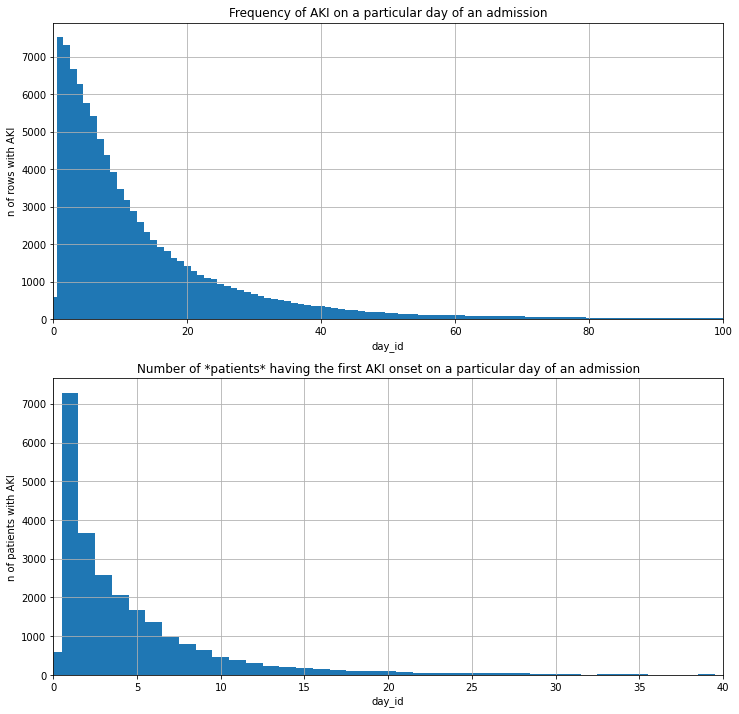

In [358]:
from matplotlib import pyplot as plt

g1 = pid[pid.aki_status==1].groupby('day_id')
index1 = g1.count().aki_status.sort_values(ascending=False).index
values1 = g1.count().aki_status.sort_values(ascending=False).values

g2 = pid[pid.aki_status==1].sort_values(['hadm_id', 'day_id'])\
                        .drop_duplicates(['hadm_id'], keep='first')\
                            .groupby('day_id')\
                                .count()
index2 = g2.aki_status.sort_values(ascending=False).index
values2 = g2.aki_status.sort_values(ascending=False).values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=False) 

ax1.bar(index1, values1, width=1)
ax1.set_xlim([0,100])
ax1.set_xlabel('day_id')
ax1.set_ylabel('n of rows with AKI')
ax1.set_title('Frequency of AKI on a particular day of an admission')
ax1.grid(True)

ax2.bar(index2, values2, width=1)
ax2.set_xlim([0,40])
ax2.set_xlabel('day_id')
ax2.set_ylabel('n of patients with AKI')
ax2.set_title('Number of *patients* having the first AKI onset on a particular day of an admission')
ax2.grid(True)

### Manually checing some of the labels:

In [329]:
pid[pid.aki_status==1].hadm_id.unique()[:10]

array([29496232, 27180483, 28406845, 28474294, 24670296, 24287964,
       26166196, 29276678, 28204953, 21462829])

In [330]:
adm = 28474294
labevents_creatinine[labevents_creatinine.hadm_id==adm]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
557,10031358,28474294,2159-10-27 07:15:00,1.1,mg/dL,2159-10-26 14:23:00,0.0
558,10031358,28474294,2159-10-28 06:35:00,1.4,mg/dL,2159-10-26 14:23:00,1.0
559,10031358,28474294,2159-10-29 11:36:00,1.3,mg/dL,2159-10-26 14:23:00,2.0
560,10031358,28474294,2159-10-30 06:40:00,1.4,mg/dL,2159-10-26 14:23:00,3.0
561,10031358,28474294,2159-10-31 06:20:00,1.3,mg/dL,2159-10-26 14:23:00,4.0
562,10031358,28474294,2159-11-01 06:39:00,1.5,mg/dL,2159-10-26 14:23:00,5.0


In [331]:
data_admissions[data_admissions.hadm_id==adm].admittime

38613   2159-10-26 14:23:00
Name: admittime, dtype: datetime64[ns]

In [332]:
pid[pid.hadm_id==adm]

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status
274,10031358.0,28474294,0.0,Insulin {30} UNIT ; Sodium Chloride 0.9% Flus...,Hematology Blood hematocrit {33.4} %; Hematolo...,temp {97.7} heartrate {77.0} resprate {18.0} o...,WHITE M 65.0,0.0
275,10031358.0,28474294,1.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {34.0} %; Hematolo...,NaN,WHITE M 65.0,1.0
276,10031358.0,28474294,2.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {33.5} %; Hematolo...,NaN,WHITE M 65.0,0.0
277,10031358.0,28474294,3.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {33.4} %; Hematolo...,NaN,WHITE M 65.0,1.0
278,10031358.0,28474294,4.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {35.0} %; Hematolo...,NaN,WHITE M 65.0,0.0
279,10031358.0,28474294,5.0,Sodium Chloride 0.9% Flush {3} mL ; TraZODone...,Hematology Blood hematocrit {32.8} %; Hematolo...,NaN,WHITE M 65.0,1.0


In [333]:
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10031358,28474294,9,E1169,10,Type 2 diabetes mellitus with other specified ...
1,10031358,28474294,17,I890,10,"Lymphedema, not elsewhere classified"
2,10031358,28474294,13,E1122,10,Type 2 diabetes mellitus with diabetic chronic...
3,10031358,28474294,8,Z794,10,Long term (current) use of insulin
4,10031358,28474294,12,L03032,10,Cellulitis of left toe
5,10031358,28474294,18,E538,10,Deficiency of other specified B group vitamins
6,10031358,28474294,2,M86172,10,"Other acute osteomyelitis, left ankle and foot"
7,10031358,28474294,5,E1140,10,Type 2 diabetes mellitus with diabetic neuropa...
8,10031358,28474294,21,Z87891,10,Personal history of nicotine dependence
9,10031358,28474294,11,E11628,10,Type 2 diabetes mellitus with other skin compl...


In [157]:
# with open(PKL_PATH + 'pid.pkl', 'wb') as f:
#     pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

## Get labels 

We first separate pretraining subject_ids from fine-tuning ones. We take 20,000 patients with AKI during the first 14 days of the admission + 20,000 patients with no AKI. 

Then, we calculate labels for these patients and make fine-tuning set.

We exclude patients ids which we use for FT from pretraining set.

In [463]:
# get 20,000 positive patients (AKI within first 14 days of the admission)
hadm_ids_aki_within_14_days = pid[(pid.aki_status==1)&(pid.day_id<=13)]\
                                    .drop_duplicates(subset=['hadm_id'])\
                                        .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_aki_within_14_days))

# get negative patients (no AKI during the admission)
pos_ids = pid[pid.aki_status==1].hadm_id.unique()
hadm_ids_NO_aki = pid[~pid.hadm_id.isin(pos_ids)]\
                        .drop_duplicates(subset=['hadm_id'])\
                            .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_NO_aki))


20000
20000


In [464]:
# fine-tuning dataset

ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_14_days + hadm_ids_NO_aki)]
ft_admissions = list(ft_pid.hadm_id.unique())
print(f'number of admissions for Fine-Tuning: {len(ft_admissions)}')

number of admissions for Fine-Tuning: 40000


In [469]:
pd.options.mode.chained_assignment = None

def get_labels(adm, pid=ft_pid):
    d = 1
    pid_adm = pid[pid.hadm_id==adm].copy().reset_index().sort_values('day_id')
    pid_labels = pid_adm[['subject_id', 'hadm_id', 'day_id', 'aki_status']]
    counter = len(pid_adm)
    
    for d in range(1, 8):
        # print('d ', d)
        col_name = 'aki_in_' + str(d) + '_days'
        if counter:
            # print('counter', counter)
            labels = (list(pid_adm.aki_status.values)[d:])
            # print('labels: ', labels)
            # print('labels + [np.nan]*d: ', labels + [np.nan]*d)
            pid_labels[col_name] = labels + [np.nan]*d
            counter = counter - 1
        else:
            pid_labels[col_name] = [np.nan] * len(pid_adm)

    return pid_labels

In [473]:
len(ft_admissions)

40000

In [470]:
%%time
import traceback
import multiprocessing

df_labels = pd.DataFrame()
admissions = ft_admissions
chunk_size = 20000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=87) as pool_obj:
        temp = pool_obj.map(get_labels, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in temp:
        df_labels = pd.concat([df_labels, e], ignore_index=True)

    print("Finished {} admissions. Saving...".format((i+1)*chunk_size))

    with open(PKL_PATH + 'df_labels.pkl', 'wb') as f:
        pickle.dump(df_labels, f, protocol=pickle.HIGHEST_PROTOCOL)

Finished 20000 admissions. Saving...
Finished 40000 admissions. Saving...
Finished 60000 admissions. Saving...
CPU times: user 3min 9s, sys: 1min 3s, total: 4min 12s
Wall time: 4min 49s


In [478]:
len(ft_pid.hadm_id.unique())

40000

In [482]:
pid_with_labels = ft_pid.merge(df_labels)
print(pid_with_labels.shape)
pid_with_labels.head()

(327010, 15)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,NaN,Hematology Blood hematocrit {39.5} %; Hematolo...,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,Hematology Blood hematocrit {37.9} %; Hematolo...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10005348.0,29496232,0.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {32.5} %; Hematolo...,NaN,WHITE M 76.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN
3,10005348.0,29496232,1.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {31.6} %; Hematolo...,NaN,WHITE M 76.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN
4,10005348.0,29496232,2.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,NaN,NaN,WHITE M 76.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN


In [488]:
# n of admissoins with labels for all  7 days
pid_with_labels[~(pid_with_labels.aki_in_1_days.isna() | pid_with_labels.aki_in_2_days.isna() | pid_with_labels.aki_in_3_days.isna()\
    | pid_with_labels.aki_in_4_days.isna()| pid_with_labels.aki_in_5_days.isna()| pid_with_labels.aki_in_6_days.isna()\
        | pid_with_labels.aki_in_7_days.isna())]\
            .hadm_id.unique().shape[0]

11491

In [ ]:
def difference(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    #return lst3
    return lst3

In [519]:
pid_with_labels['day_info'] = pid_with_labels['demographics'].astype(str) + '$' +  pid_with_labels['vitals'].astype(str) + '$' + pid_with_labels['lab_tests'].astype(str) + '$' + pid_with_labels['medications'].astype(str)

In [491]:
pid_with_labels = pid_with_labels[['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status', \
    'aki_in_1_days',	'aki_in_2_days'	,'aki_in_3_days',	'aki_in_4_days',	'aki_in_5_days',	'aki_in_6_days',	'aki_in_7_days' ]]

In [520]:
pid_with_labels.head(2)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {39.5} %; Hematolo...,NaN,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {97.7} hear...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {37.9} %; Hematolo...,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {99.1} hear...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [493]:
pid_with_labels.loc[0,-1]

nan

In [893]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.04 # test + val size
VAL_SIZE = 0.5
print('n unique admissions: ', len(pid_1day_labels_cleaned.hadm_id.unique()))
train_adms, test_adms = train_test_split(pid_1day_labels_cleaned.hadm_id.unique(), test_size=TEST_SIZE)
test_adms, val_adms = train_test_split(test_adms, test_size=VAL_SIZE)
print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))



Splitting training and testing datsets...
n unique admissions:  165503
n train admissions:  158882
n test admissions:  3310
n val admissions:  3311


## Saving

### Save df for Pre-training

In [498]:
# pid_noAKIstatus_463k
with open(PKL_PATH + 'pid_noAKIstatus_463k.pkl', 'rb') as f:
    pid_noAKIstatus_463k = pickle.load(f)

pid_noAKIstatus_463k.hadm_id.unique().shape[0]

463830

In [499]:
pretraining_df = pid_noAKIstatus_463k[~pid_noAKIstatus_463k.hadm_id.isin(ft_admissions)]
pretraining_df.hadm_id.unique().shape[0]

423830

In [505]:
pretraining_df.head(2)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics
1411116,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0
1411117,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0


In [504]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
VAL_SIZE = 0.01

print('n unique admissions: ', len(pretraining_df.hadm_id.unique()))
train_adms, val_adms = train_test_split(pretraining_df.hadm_id.unique(), test_size=VAL_SIZE)

print('n train admissions: ', len(train_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  423830
n train admissions:  419591
n val admissions:  4239


In [507]:
train_df_pre = pretraining_df[pretraining_df.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals']]
val_df_pre = pretraining_df[pretraining_df.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals']]

In [510]:
# save data frames
DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

with open(DF_PATH + 'train_df_pretraining.pkl', 'wb') as f:
    pickle.dump(train_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'val_df_pretraining.pkl', 'wb') as f:
    pickle.dump(val_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

### Save for Fine-Tuning

In [521]:
print(pid_with_labels.hadm_id.unique().shape[0])
pid_with_labels.head(2)

40000


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {39.5} %; Hematolo...,NaN,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {97.7} hear...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {37.9} %; Hematolo...,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {99.1} hear...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.15
VAL_SIZE = 0.5

print('n unique admissions: ', len(pid_with_labels.hadm_id.unique()))

train_adms, temp_adms = train_test_split(pid_with_labels.hadm_id.unique(), test_size=TEST_SIZE)
test_adms, val_adms = train_test_split(temp_adms, test_size=VAL_SIZE)

print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  40000
n train admissions:  34000
n test admissions:  3000
n val admissions:  3000


In [523]:
train_df_finetuning = pid_with_labels[pid_with_labels.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status', 'aki_in_1_days','aki_in_2_days','aki_in_3_days','aki_in_4_days','aki_in_5_days','aki_in_6_days','aki_in_7_days']]
test_df_finetuning = pid_with_labels[pid_with_labels.hadm_id.isin(test_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status','aki_in_1_days','aki_in_2_days','aki_in_3_days','aki_in_4_days','aki_in_5_days','aki_in_6_days','aki_in_7_days']]
val_df_finetuning = pid_with_labels[pid_with_labels.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status','aki_in_1_days','aki_in_2_days','aki_in_3_days','aki_in_4_days','aki_in_5_days','aki_in_6_days','aki_in_7_days']]

In [524]:
train_df_finetuning.head(1)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {39.5} %; Hematolo...,NaN,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {97.7} hear...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
# save data frames
DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

with open(DF_PATH + 'train_df_finetuning.pkl', 'wb') as f:
    pickle.dump(train_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'test_df_finetuning.pkl', 'wb') as f:
    pickle.dump(test_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'val_df_finetuning.pkl', 'wb') as f:
    pickle.dump(val_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

In [527]:
print('n samples in train_df', len(train_df_finetuning))
print('n samples in test_df', len(test_df_finetuning))
print('n samples in val_df', len(val_df_finetuning))

n samples in train_df 278009
n samples in test_df 24927
n samples in val_df 24074


In [908]:
from tqdm.auto import tqdm

def create_text_seq(data, txt_dir):
    text_data = []
    file_count = 0

    for _, sample in tqdm(data.iterrows()):
        text_data.append(sample['day_info'])
        if len(text_data) == 5000:
            # once we hit the 5K mark, save to file
            if not os.path.exists(txt_dir):
                os.makedirs(txt_dir)
            with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
                fp.write('\n'.join(text_data))
            text_data = []
            file_count += 1
            print(f"Saved {5000 + (5000 * (file_count - 1))} samples")

    if (len(data) % 5000) != 0:
        with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        print(f"Saved {5000 + (5000 * (file_count - 1)) + len(text_data)} samples")

In [ ]:
TXT_DIR_TRAIN = '/home/svetlana.maslenkova/AKI_deep/txt_files/train'
create_text_seq(data=train_df, txt_dir=TXT_DIR_TRAIN)

In [915]:
# read some txt
i = 0
with open(TXT_DIR_TRAIN+'/text_0.txt') as f:
    for line in f:
        print(line)
        print('-----------------------------------------')
        i = i + 1
        if i > 1:
            break
f.close()

HISPANIC/LATINO F 76.0 temp {98.0} heartrate {65.0} resprate {16.0} o2sat {100.0} sbp {106.0} dbp {50.0} rhythm {} pain {0}  Hematology Blood hematocrit {26.5} %; Hematology Blood hemoglobin {9.2} g/dL; Hematology Blood platelet count {183} K/uL; Chemistry Blood anion gap {14} mEq/L; Chemistry Blood bicarbonate {24} mEq/L; Chemistry Blood chloride {103} mEq/L; Chemistry Blood creatinine {1.1} mg/dL; Chemistry Blood potassium {3.5} mEq/L; Chemistry Blood sodium {137} mEq/L; Chemistry Blood urea nitrogen {19} mg/dL; Chemistry Blood glucose {169} mg/dL PNEUMOcoccal 23-valent polysaccharide vaccine {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; 0.9% Sodium Chloride {1000} mL ; Acetaminophen {500-1000} mg ; Polyethylene Glycol {17} g ; Iso-Osmotic Dextrose {50} mL ; CeftriaXONE {1} gm ; Insulin {0} UNIT ; Dextrose 50% {12.5} gm ; Glucagon {1} mg ; Glucose Gel {15} g ; Docusate Sodium {100} mg ; Heparin {5000} UNIT ; Aspirin {81} mg ; CeftriaXONE {2} gm ; Bag {100} mL ; Magnesium Sulfate {4

In [919]:
# 2650
maxlen = -1
for doc in train_df.day_info:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print('the maximum len is ', maxlen)

the maximum len is  2650


In [ ]:
from tokenizers import  Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import glob

tokenizer.pre_tokenizer = Whitespace()

files = glob.glob(TXT_DIR_TRAIN+'/*')
tokenizer.train(files, trainer)

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[PAD]", "[UNK]"], vocab_size=15463)

# tokenizer.save(CURR_PATH+"/tokenizer.json")

In [1034]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, df_path, tokenizer, max_length):
        self.df = pd.read_csv(df_path)
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        token_input = self.tokenize(self.df.day_info.values[idx], self.max_length)
        y_data = torch.tensor(self.df.aki_status.values[idx], dtype=torch.float32)

        return torch.tensor(token_input, dtype=torch.int32), y_data
    
    def tokenize(self, text, max_length):
        
        output = self.tokenizer.encode(text)

        if len(output.ids) < max_length:
            len_missing_token = max_length - len(output.ids)
            padding_vec = [self.tokenizer.token_to_id('[PAD]') for _ in range(len_missing_token)]
            token_output = [*output.ids, *padding_vec]
        elif len(output.ids) > max_length:
            token_output = output.ids[:max_length]
        else:
            token_output = output.ids
        
        return token_output
   


In [1035]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8
train_dataset = MyDataset(train_df, tokenizer=tokenizer, max_length=128)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# test
# train_features, train_labels = next(iter(train_dataloader))
# train_features.shape

In [1044]:
# testing cell
# text = "HISPANIC/LATINO F 76.0 temp {98.0} heartrate {65.0} resprate {16.0} o2sat {100.0} sbp {106.0} dbp {50.0} rhythm {} pain {0}  Hematology Blood hematocrit {26.5} %; Hematology Blood hemoglobin {9.2} g/dL; Hematology Blood platelet count {183} K/uL; Chemistry Blood anion gap {14} mEq/L; Chemistry Blood bicarbonate {24} mEq/L; Chemistry Blood chloride {103} mEq/L; Chemistry Blood creatinine {1.1} mg/dL; Chemistry Blood potassium {3.5} mEq/L; Chemistry Blood sodium {137} mEq/L; Chemistry Blood urea nitrogen {19} mg/dL; Chemistry Blood glucose {169} mg/dL PNEUMOcoccal 23-valent polysaccharide vaccine {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; 0.9% Sodium Chloride {1000} mL ; Acetaminophen {500-1000} mg ; Polyethylene Glycol {17} g ; Iso-Osmotic Dextrose {50} mL ; CeftriaXONE {1} gm ; Insulin {0} UNIT ; Dextrose 50% {12.5} gm ; Glucagon {1} mg ; Glucose Gel {15} g ; Docusate Sodium {100} mg ; Heparin {5000} UNIT ; Aspirin {81} mg ; CeftriaXONE {2} gm ; Bag {100} mL ; Magnesium Sulfate {4} gm ; "
# output = tokenizer.encode(text)
# max_length = 128

# print(output.tokens)
# print(output.ids)

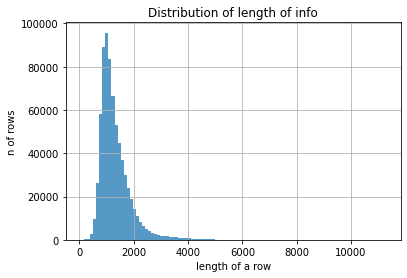

In [1075]:
from matplotlib import pyplot as plt
plt.hist(train_df.day_info.str.len(), bins=100, alpha=0.75)
plt.xlabel('length of a row')
plt.ylabel('n of rows')
plt.title('Distribution of length of info')
plt.grid(True)
plt.show()

In [1070]:
length_of_stay = train_df.sort_values(by=['hadm_id', 'day_id'], ascending=False).drop_duplicates(['hadm_id'])

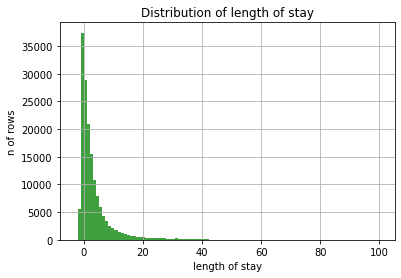

In [1076]:
from matplotlib import pyplot as plt
plt.hist(length_of_stay.day_id, bins=100, alpha=0.75, facecolor='g', range=(np.min(length_of_stay.day_id), 100))
plt.xlabel('length of stay')
plt.ylabel('n of rows')
plt.title('Distribution of length of stay')
plt.grid(True)
plt.show()

In [1081]:
print('n of admissions with length of stay up to 25 days', length_of_stay[length_of_stay.day_id <= 25].shape[0])
print('n of admissions with length of more than 25 days', length_of_stay[length_of_stay.day_id > 25].shape[0])


n of admissions with length of stay up to 25 days 155960
n of admissions with length of more than 25 days 2922


In [18]:
with open(DF_PATH + 'test_df.pkl', 'rb') as f:
   test_df = pickle.load(f)

with open(DF_PATH + 'val_df.pkl', 'rb') as f:
   val_df = pickle.load(f)

In [19]:
print(val_df.shape)
val_df.head(3)

(14780, 9)


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status
113,10926139,20001811,0,WHITE M 57.0,Hematology Blood hematocrit {30.2} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Sodium Ch...,NaN,WHITE M 57.0 nan Hematology Blood hematocrit {...,0.0
115,10926139,20001811,3,WHITE M 57.0,Hematology Blood hematocrit {28.9} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Senna {8....,NaN,WHITE M 57.0 nan Hematology Blood hematocrit {...,0.0
116,10926139,20001811,4,WHITE M 57.0,Hematology Blood hematocrit {28.8} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Senna {8....,NaN,WHITE M 57.0 nan Hematology Blood hematocrit {...,0.0


In [17]:
# make pid_df 
def make_pid_df(df, SAVE_TO_PATH):
    pid_df = df.copy()
    adms = list(pid_df.hadm_id.unique())
    pid_list_of_dicts = []
    i = 0
    days = []

    for pid_adm in adms:
        toy = pid_df.copy()[pid_df.hadm_id == pid_adm]
        pid_subject_id = toy.subject_id.values[0]

        days_in_visit = []
        demographics_in_visit = []
        lab_tests_in_visit = []
        medications_in_visit = []
        vitals_in_visit = []
        aki_status_in_visit = []
        days = []

        for _, row in toy.iterrows():
            days_in_visit.append(row['day_info'])
            demographics_in_visit.append(row['demographics'])
            lab_tests_in_visit.append(row['lab_tests'])
            medications_in_visit.append(row['medications'])
            vitals_in_visit.append(row['vitals'])
            aki_status_in_visit.append(int(row['aki_status']))
            days.append(row['day_id'])

        pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':pid_adm, \
                    'demographics_in_visit':demographics_in_visit,\
                    'lab_tests_in_visit':lab_tests_in_visit,\
                    'medications_in_visit':medications_in_visit,
                    'vitals_in_visit':vitals_in_visit,\
                    'days_in_visit':days_in_visit, \
                    'aki_status_in_visit':aki_status_in_visit, \
                        'days':days})
                    
        i += 1
        # if i >5: break

        if i  % 1000 == 0:
            # with open(DF_PATH + 'pid_list_of_dicts.pkl', 'wb') as f:
            #     pickle.dump(pid_list_of_dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(f'{i} admissions finished')

    pid_test_df = pd.DataFrame(pid_list_of_dicts)

    with open(SAVE_TO_PATH, 'wb') as f:
        pickle.dump(pid_test_df, f, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'{i} admissions saved into a dataframe to ----> {SAVE_TO_PATH}')


In [21]:
SAVE_TO_PATH = DF_PATH + 'pid_val_df.pkl'
make_pid_df(val_df, SAVE_TO_PATH)

1000 admissions finished
2000 admissions finished
3000 admissions finished
3311 admissions saved into a dataframe to ----> /home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_val_df.pkl


In [16]:
pid_test_df.head()

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,aki_status_in_visit,days
0,18835383,20001135,[WHITE M 89.0],[Hematology Blood hematocrit {31.3} %; Hematol...,[Influenza Virus Vaccine {0.5} mL ; PNEUMOcocc...,[temp {97.9} heartrate {57.0} resprate {16.0} ...,[WHITE M 89.0 temp {97.9} heartrate {57.0} res...,[0],[0]
1,17256683,20006820,"[WHITE M 66.0, WHITE M 66.0]",[Hematology Blood hematocrit {24.3} %; Hematol...,[Sodium Chloride 0.9% Flush {3} mL ; Sodium C...,[temp {97.3} heartrate {111.0} resprate {22.0}...,[WHITE M 66.0 temp {97.3} heartrate {111.0} re...,"[0, 0]","[0, 1]"
2,17598948,20010211,[UNKNOWN F 26.0],[Hematology Blood hematocrit {42.2} %; Hematol...,[Influenza Virus Vaccine {0.5} mL ; Sodium Chl...,[nan],[UNKNOWN F 26.0 nan Hematology Blood hematocri...,[0],[0]
3,17644781,20010239,[WHITE M 74.0],[Hematology Blood hematocrit {35.8} %; Hematol...,[Vial {1} VIAL ; Pantoprazole {40} mg ; Sodium...,[temp {98.5} heartrate {82.0} resprate {18.0} ...,[WHITE M 74.0 temp {98.5} heartrate {82.0} res...,[0],[0]
4,13412143,20014367,[WHITE M 53.0],[Hematology Blood hematocrit {36.5} %; Hematol...,[1/2 NS {1000} mL ; Morphine Sulfate {2-6} mg ...,[nan],[WHITE M 53.0 nan Hematology Blood hematocrit ...,[0],[0]


In [ ]:
# with open(DF_PATH + 'train_df.pkl', 'rb') as f:
#     train_df = pickle.load(f)

# with open(DF_PATH + 'pid_list_of_dicts.pkl', 'rb') as f:
#     pid_df = pickle.load(f)

# pid_df = pd.DataFrame(pid_df)

# days = []
# i = 0
# for adm in pid_df.hadm_id.unique():
#     days.append(train_df[train_df.hadm_id==adm].day_id.values)
#     #i += 1
#     #if i >5:break

# pid_df['days'] = days

In [23]:
with open(DF_PATH + 'train_df.pkl', 'rb') as f:
   train_df = pickle.load(f)

In [32]:
# check how many patients had aki < 10 days

S = train_df[train_df.aki_status==1.0].sort_values('day_id').drop_duplicates(subset='hadm_id')
S[S.day_id < 10]

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status
458008,17443681,24690642,-2,WHITE F 78.0,Hematology Blood hematocrit {27.3} %; Hematolo...,NaN,temp {97.2} heartrate {106.0} resprate {18.0} ...,WHITE F 78.0 temp {97.2} heartrate {106.0} res...,1.0
768433,15177955,27882895,-2,WHITE F 89.0,Hematology Blood hematocrit {42.3} %; Hematolo...,NaN,temp {98.4} heartrate {76.0} resprate {14.0} o...,WHITE F 89.0 temp {98.4} heartrate {76.0} resp...,1.0
189104,11605177,26431375,-2,WHITE F 84.0,Hematology Blood hematocrit {16.0} %; Hematolo...,NaN,temp {97.3} heartrate {81.0} resprate {20.0} o...,WHITE F 84.0 temp {97.3} heartrate {81.0} resp...,1.0
868152,16386312,28904280,-2,WHITE M 80.0,Hematology Blood hematocrit {31.9} %; Hematolo...,NaN,temp {97.6} heartrate {58.0} resprate {17.0} o...,WHITE M 80.0 temp {97.6} heartrate {58.0} resp...,1.0
161942,17894333,22030479,-2,WHITE M 60.0,Hematology Blood hematocrit {39.3} %; Hematolo...,NaN,NaN,WHITE M 60.0 nan Hematology Blood hematocrit {...,1.0
...,...,...,...,...,...,...,...,...,...
195255,15709543,26509318,9,WHITE M 31.0,Hematology Blood hematocrit {25.3} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Gabapenti...,NaN,WHITE M 31.0 nan Hematology Blood hematocrit {...,1.0
868001,14623995,28902597,9,OTHER M 63.0,Hematology Blood hematocrit {32.5} %; Hematolo...,Nicotine Patch {14} mg ; Sodium Chloride 0.9% ...,NaN,OTHER M 63.0 nan Hematology Blood hematocrit {...,1.0
320615,10174787,23289988,9,WHITE M 77.0,Hematology Blood hematocrit {32.0} %; Hematolo...,Heparin {5000} UNIT ; Bisacodyl {10} mg ; Insu...,NaN,WHITE M 77.0 nan Hematology Blood hematocrit {...,1.0
838306,19447329,28593598,9,WHITE F 92.0,Hematology Blood hematocrit {26.8} %; Hematolo...,OxyCODONE (Immediate Release) {2.5-5} mg ; Ace...,NaN,WHITE F 92.0 nan Hematology Blood hematocrit {...,1.0
